In [ ]:
# !pip install catboost

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/glass.csv')

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [ ]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


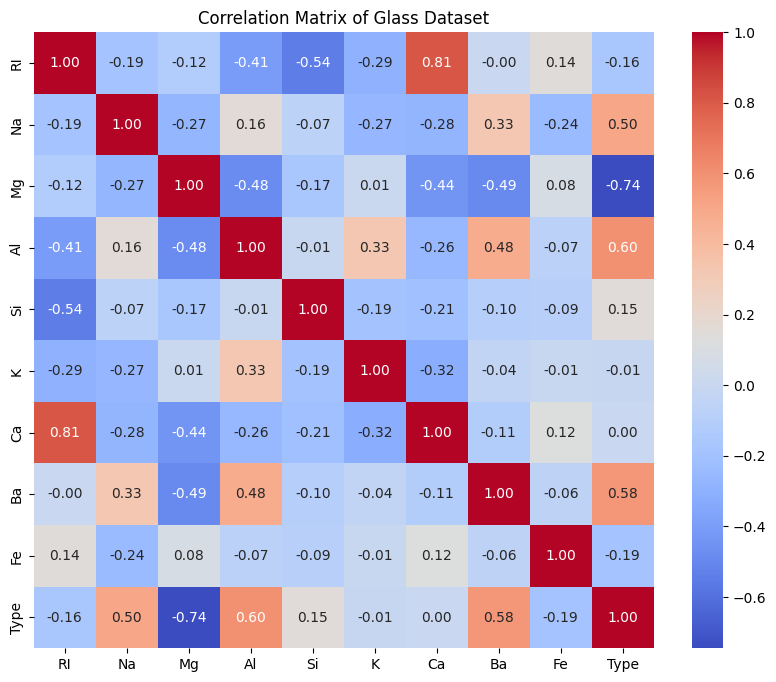

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Glass Dataset')
plt.show()

In [ ]:
corr_mat = abs(df.corr())

In [ ]:
corr_mat[corr_mat>0.1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.191885,0.122274,0.407326,0.542052,0.289833,0.810403,NaN,0.143010,0.164237
Na,0.191885,1.000000,0.273732,0.156794,NaN,0.266087,0.275442,0.326603,0.241346,0.502898
Mg,0.122274,0.273732,1.000000,0.481799,0.165927,NaN,0.443750,0.492262,NaN,0.744993
Al,0.407326,0.156794,0.481799,1.000000,NaN,0.325958,0.259592,0.479404,NaN,0.598829
Si,0.542052,NaN,0.165927,NaN,1.000000,0.193331,0.208732,0.102151,NaN,0.151565
K,0.289833,0.266087,NaN,0.325958,0.193331,1.000000,0.317836,NaN,NaN,NaN
Ca,0.810403,0.275442,0.443750,0.259592,0.208732,0.317836,1.000000,0.112841,0.124968,NaN
Ba,NaN,0.326603,0.492262,0.479404,0.102151,NaN,0.112841,1.000000,NaN,0.575161
Fe,0.143010,0.241346,NaN,NaN,NaN,NaN,0.124968,NaN,1.000000,0.188278
Type,0.164237,0.502898,0.744993,0.598829,0.151565,NaN,NaN,0.575161,0.188278,1.000000


Фичи сильно коррелируют между собой - отметаю лин регрессию

In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']

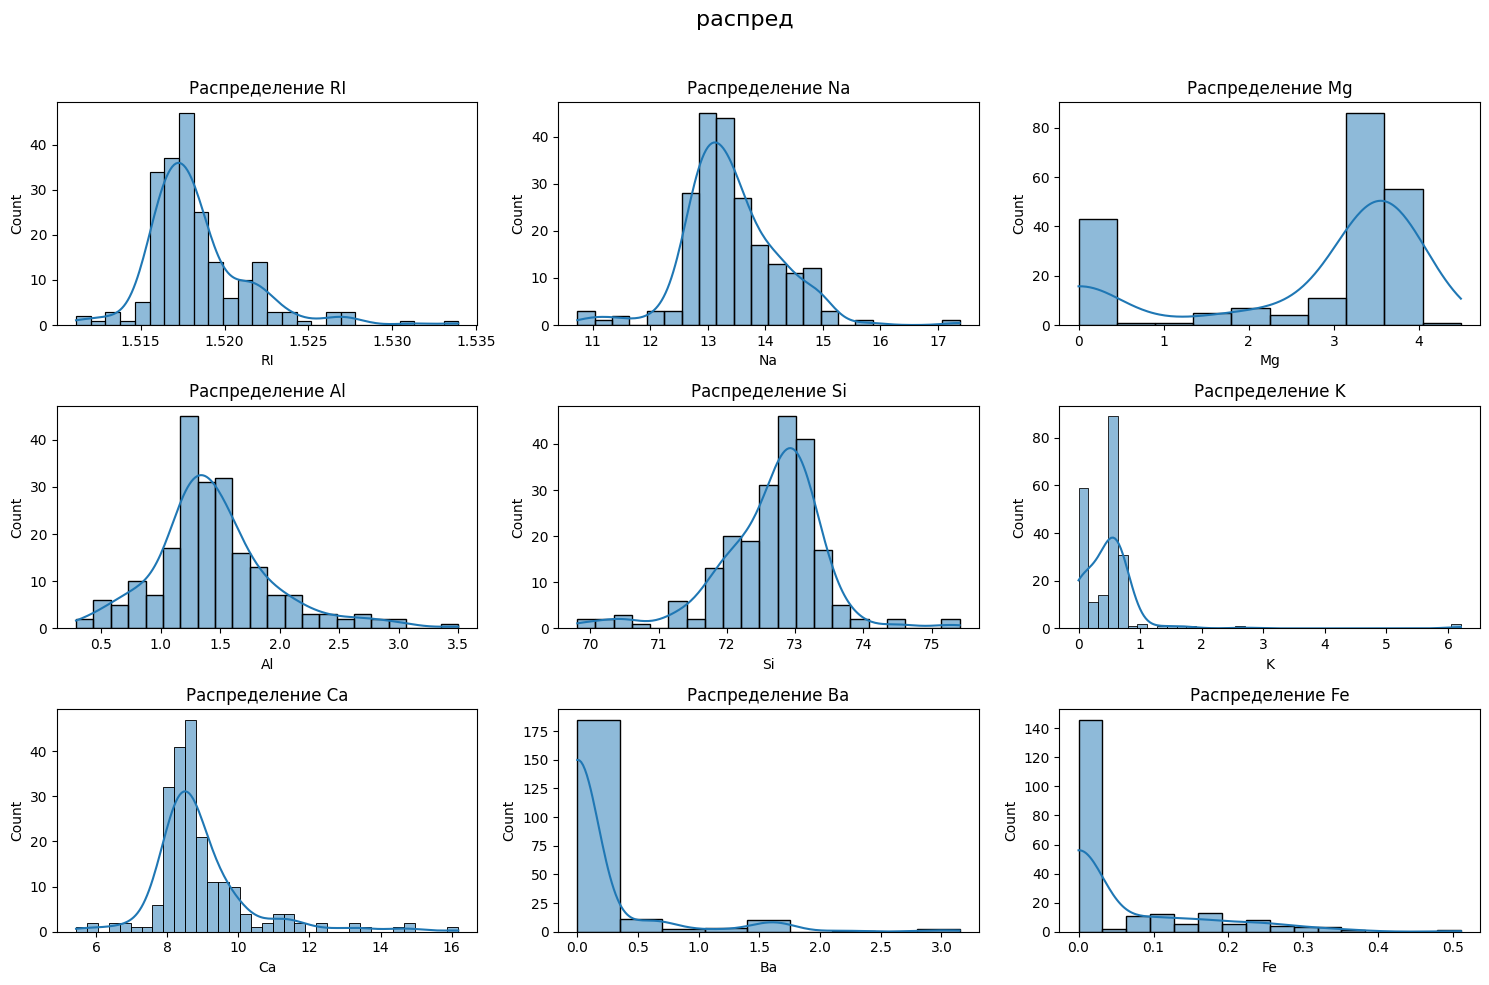

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('распред', fontsize=16)

columns = X.columns
for i, ax in enumerate(axes.flat):
    sns.histplot(X[columns[i]], kde=True, ax=ax)
    ax.set_title(f'Распределение {columns[i]}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Видим, что распределение Ba, K, Fe далеки от нормальных.

хз по-моему стало хуже после boxpox, acccuracy = 0.69
после PCa = 0.68

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.Fe.value_counts()

,count
Fe,
0.00,144
0.24,7
0.17,7
0.09,6
0.10,5
0.11,4
0.16,3
0.28,3
0.12,3


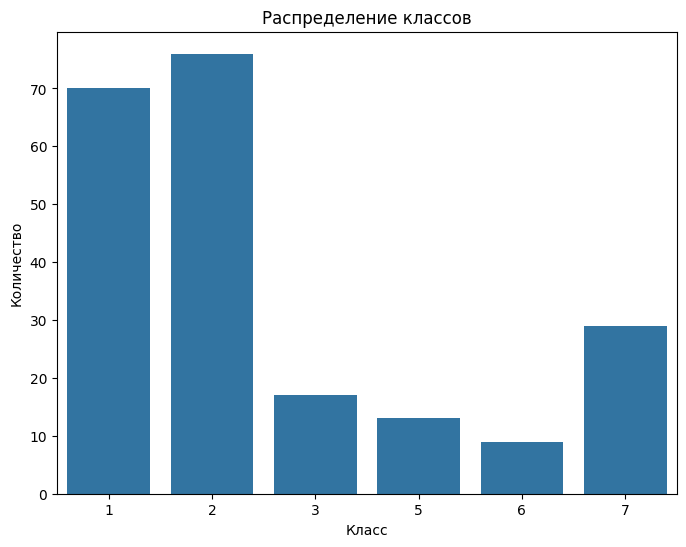

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

#disbalance sho pizdets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
smote_class_distribution = pd.Series(y_train_smote).value_counts(normalize=True)
smote_class_distribution

,proportion
Type,
7,0.166667
1,0.166667
2,0.166667
3,0.166667
6,0.166667
5,0.166667


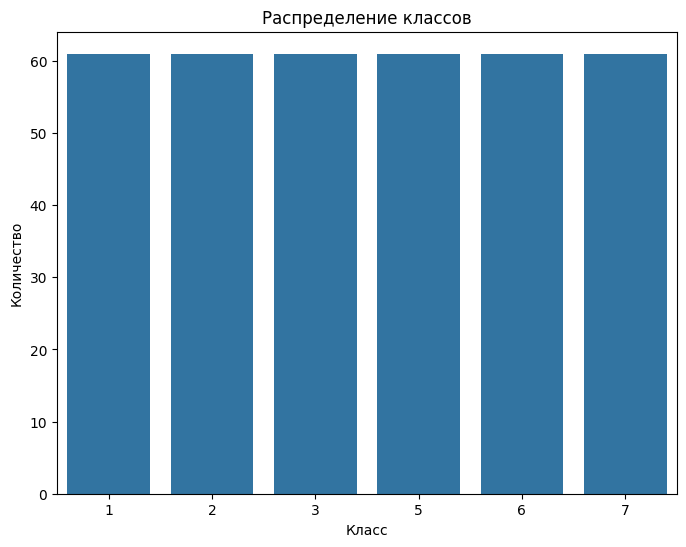

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote)
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

#disbalance

In [ ]:
def train_and_evaluate_model(model, model_name):
    cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')

    print(f"Model: {model_name}")
    print(f"Mean cross-validation f1: {cv_scores.mean():.2f}")
    print("="*60)

    model.fit(X_train_smote, y_train_smote)

    y_pred_test = model.predict(X_test)

    print(f"Test predictions for {model_name}:")
    print(y_pred_test)
    print("="*60)

In [ ]:
models = {
    "Random Forest Classifier": RandomForestClassifier(random_state=44),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=0),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

WiTHOUT SMOTE:::
Logistic: 0.58
ADA: 0.47
RF: 0.75
Gaussian Process: 0.65
Naive Bayes: 0.37
KNN: 0.61
Support vector: 0.68
Decision tree: 0.63
CatBoost: 0.77

In [ ]:
for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)

Model: Random Forest Classifier
Mean cross-validation f1: 0.88
Test predictions for Random Forest Classifier:
[7 5 2 5 1 2 2 2 1 1 3 1 7 6 1 7 7 1 1 5 1 1 7 2 1 3 2 6 2 3 2 1 1 2 2 2 1
 1 2 3 1 2 6]
Model: Gaussian Process Classifier
Mean cross-validation f1: 0.80
Test predictions for Gaussian Process Classifier:
[7 5 2 5 1 2 2 6 1 1 3 1 7 6 1 7 7 3 3 5 2 1 7 2 1 3 5 6 1 3 7 1 1 2 1 2 3
 3 2 3 3 2 6]
Model: K-Neighbors Classifier
Mean cross-validation f1: 0.81
Test predictions for K-Neighbors Classifier:
[7 5 2 5 3 2 2 6 3 1 3 1 7 6 1 7 7 1 1 5 2 1 7 2 1 3 5 6 1 3 2 3 1 2 1 2 3
 3 2 1 3 2 6]
Model: Decision Tree Classifier
Mean cross-validation f1: 0.80
Test predictions for Decision Tree Classifier:
[7 5 2 5 2 2 2 6 1 1 3 1 7 6 2 7 7 3 1 5 2 1 7 2 3 1 2 6 3 2 2 2 1 7 1 1 3
 1 1 3 1 2 6]
Model: CatBoost Classifier
Mean cross-validation f1: 0.90
Test predictions for CatBoost Classifier:
[[7]
 [5]
 [2]
 [5]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [3]
 [1]
 [7]
 [6]
 [1]
 [7]
 [7]
 [1]
 [1]
 [5]
 [

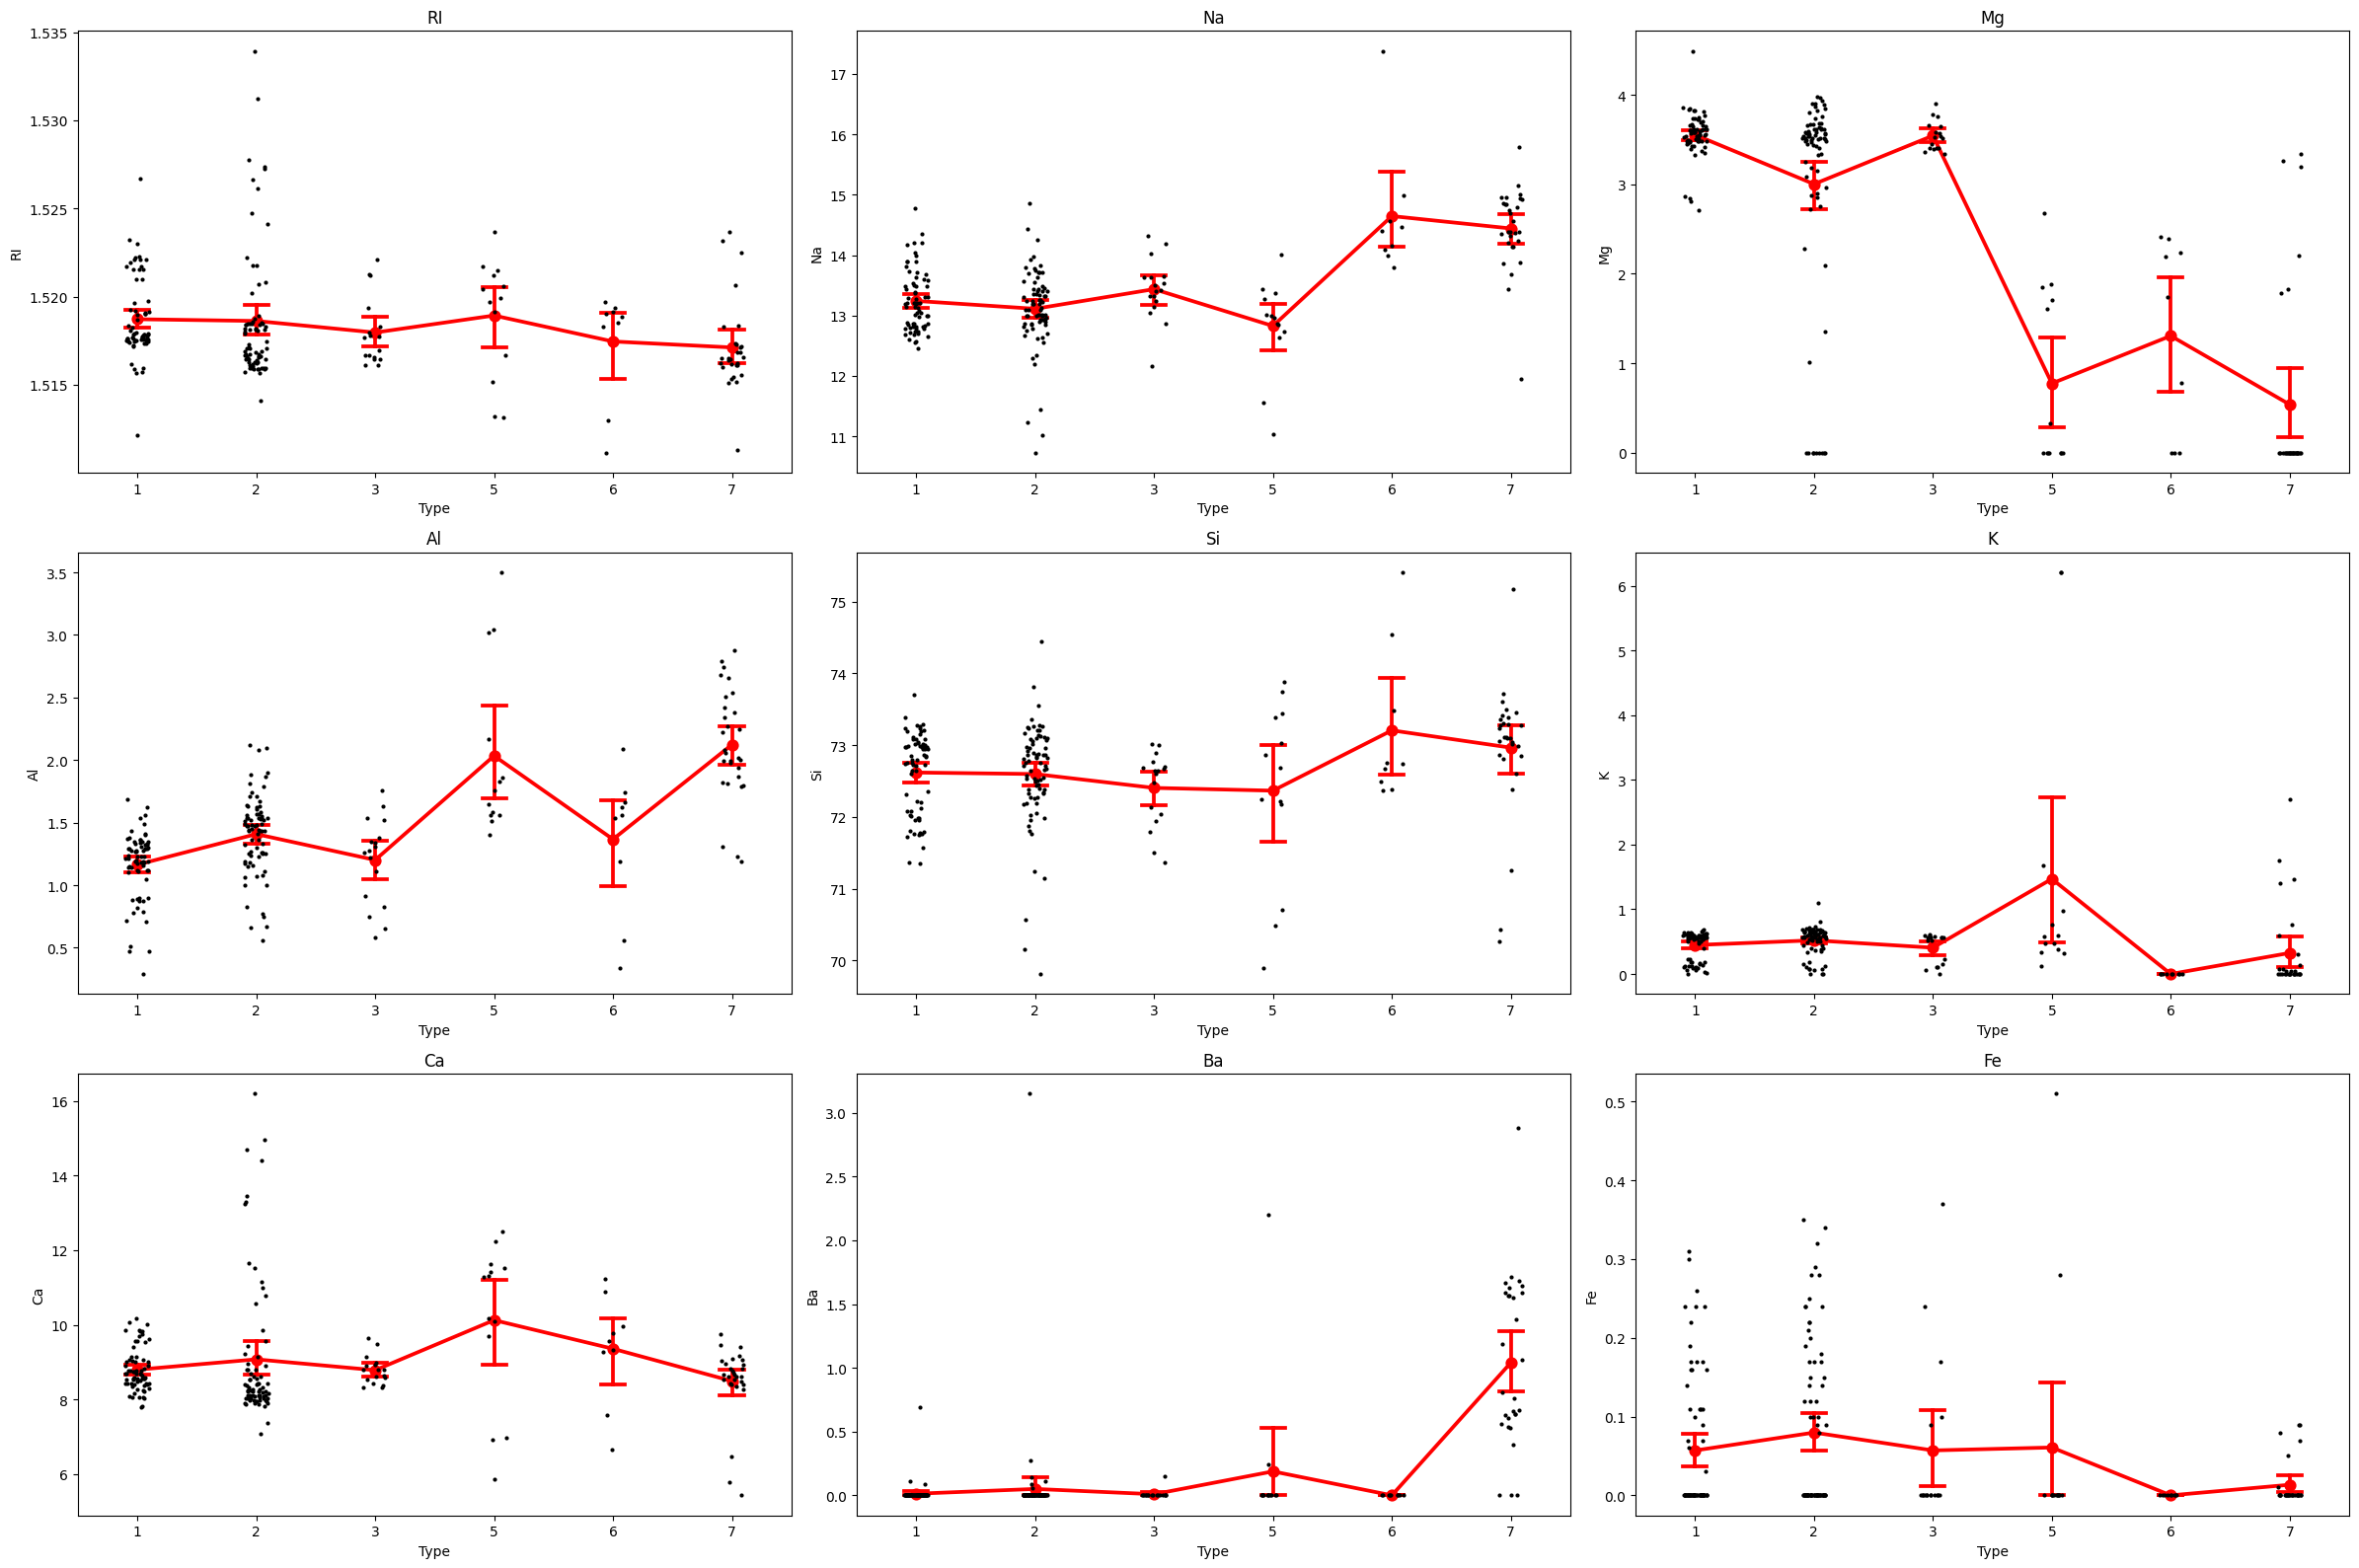

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(24, 16))
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.stripplot(x='Type', y=feature, data=df, jitter=True, alpha=1.0, size=3, color='black')
    sns.pointplot(x='Type', y=feature, data=df, capsize=.2, color='red')
    plt.title(feature)
    plt.ylabel(f'{feature}')
    plt.xlabel('Type')

plt.tight_layout()
plt.show()


Initial Model: Random Forest Classifier
Mean cross-validation f1: 0.88

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
Лучшая оценка F1: 0.9058441166991893

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'criterion': 'entropy', 'bootstrap': False}
Лучшая оценка F1: 0.9085017365886932

In [ ]:
param_grid = {
    'n_estimators': range(100, 400, 50),
    'max_depth': range(10,100, 20),
    'min_samples_split': range(2, 5, 1),
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='f1_macro')

random_search.fit(X_train_smote, y_train_smote)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая оценка F1: {best_score}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
Лучшая оценка F1: 0.9085017365886932


In [ ]:
best_model = random_search.best_estimator_

In [ ]:
y_pred_test = best_model.predict(X_test)

f1 = f1_score(y_test, y_pred_test, average='weighted')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


F1 Score: 0.8454695492054832
Accuracy: 0.8372093023255814


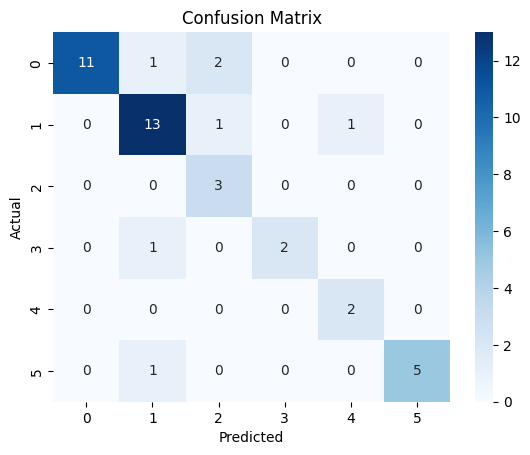

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': range(100,140, 10),
    'max_depth': range(7,12),
    'min_samples_split': [4, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'criterion': ['entropy'],
    'bootstrap': [True, False]
}

# Инициализация RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Обучение GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Вывод лучших параметров и наилучшей оценки
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

best_params_grid, best_score_grid


Fitting 5 folds for each of 160 candidates, totalling 800 fits


({'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': 11,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 130},
 0.9095168061505167)

In [ ]:
best_after_grid = grid_search.best_estimator_

In [ ]:
y_pred_test = best_after_grid.predict(X_test)

f1 = f1_score(y_test, y_pred_test, average='weighted')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.8508915943719474
Accuracy: 0.8372093023255814


What if i delete Ferrum at all??? - doesnt work